In [1]:
# Import libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tldextract
import urllib.request

from collections import Counter
from datetime import datetime

In [2]:
# Open the Décodex data which can be downloaded at
# http://s1.lemde.fr/mmpub/data/decodex/hoax/hoax_debunks.json
decodex_url = 'http://s1.lemde.fr/mmpub/data/decodex/hoax/hoax_debunks.json'
with urllib.request.urlopen(decodex_url) as f:
  df = json.load(f)

In [3]:
# The file is a dictionary with 2 main keys : debunks and hoaxes
# debunks = debunk_number['What we think', 'True or False', 'What is known', 'Link to a more factual article']
debunks = df['debunks']
# hoaxes = {'hoax.address.com' : 'debunk_number'}
hoaxes = df['hoaxes']
print('First debunk:', debunks['1'], '\n\nFirst Hoax:', list(hoaxes.keys())[0])

First debunk: ["Ce prêtre a-t-il été agressé à Avignon en février 2017, sans que les médias n'en parlent ?", 'FAUX', 'La rumeur fait référence à une vraie agression, mais qui date de mai 2013. Les faits ont alors été largement évoqués par de nombreux médias régionaux et nationaux.', 'https://www.lemonde.fr/les-decodeurs/article/2017/02/27/des-militants-denoncent-l-omerta-des-medias-sur-l-agression-d-un-pretre-a-avignon-qui-date-de-2013_5086287_4355770.html'] 

First Hoax: https://www.facebook.com/CorentinFNJ/posts/250959068694828


In [4]:
# We want the hoaxes to have a more regular format like {'hoax_number':['hoax1.address.com', 'hoax2.address.com']}
hxs = {} 
for key, value in hoaxes.items(): 
   if value in hxs: 
       hxs[value].append(key) 
   else: 
       hxs[value]=[key] 

In [5]:
# Now our hoaxes dict is comprised of keys which correspond to the debunk_id
# followed by a list of the links to the hoax posts
hxs['1']

['https://www.facebook.com/CorentinFNJ/posts/250959068694828',
 'http://www.paulomouvementcitoyen.com/2017/02/un-pretre-agresse-a-avignon.html',
 'https://www.blog.sami-aldeeb.com/2017/02/06/pretre-agresse-a-avignon-si-ca-avait-ete-un-imam/',
 'https://francaisdefrance.wordpress.com/2016/12/12/agression-dun-moine-hier-soir-silence-total-heureusement-il-y-a-internet/',
 'https://www.facebook.com/10212204315883498/posts/10212140163199721',
 'https://www.facebook.com/387841388254774/posts/383701835335396',
 'https://twitter.com/MONSTERLOVE696/status/976170425272160258']

In [6]:
# Now we can convert our hxs dict to a DataFrame
df_hxs = pd.DataFrame.from_dict(hxs, orient='index')
df_hxs = df_hxs.stack().to_frame().reset_index().drop('level_1', axis=1)
df_hxs.columns = ['debunk_id', 'hoax_link']
df_hxs.head(5)

,debunk_id,hoax_link
0,1,https://www.facebook.com/CorentinFNJ/posts/250...
1,1,http://www.paulomouvementcitoyen.com/2017/02/u...
2,1,https://www.blog.sami-aldeeb.com/2017/02/06/pr...
3,1,https://francaisdefrance.wordpress.com/2016/12...
4,1,https://www.facebook.com/10212204315883498/pos...


In [7]:
# We can do the same for the debunks dict
df_dbnk = pd.DataFrame.from_dict(debunks, orient='index',
                                 columns = ['hoax_summary', 'true_false', 'debunk_brief', 'debunk_link'])
df_dbnk.head(5)

,hoax_summary,true_false,debunk_brief,debunk_link
1,Ce prêtre a-t-il été agressé à Avignon en févr...,FAUX,La rumeur fait référence à une vraie agression...,https://www.lemonde.fr/les-decodeurs/article/2...
2,Emmanuel Macron a-t-il déclaré vouloir faire p...,FAUX,Il s'agit d'un article du site parodique BuzzB...,https://crosscheck.firstdraftnews.com/checked-...
3,Ce pompier a-t-il eu « l’œil crevé par une rac...,FAUX,Cette rumeur qui a circulé en février 2017 est...,https://www.lemonde.fr/les-decodeurs/article/2...
4,Un élu PS a-t-il été relaxé après un excès de ...,FAUX,Contrairement à ce que laisse entendre la rume...,https://www.lemonde.fr/les-decodeurs/article/2...
5,Les médias ont-ils caché l'affaire des « frais...,FAUX,Contrairement à ce que les rumeurs qui circule...,https://www.lemonde.fr/les-decodeurs/article/2...


In [8]:
# Since the index value is based on our dict key, we can now pass it as an id column
df_dbnk['debunk_id'] = df_dbnk.index
df_dbnk.head(5)

,hoax_summary,true_false,debunk_brief,debunk_link,debunk_id
1,Ce prêtre a-t-il été agressé à Avignon en févr...,FAUX,La rumeur fait référence à une vraie agression...,https://www.lemonde.fr/les-decodeurs/article/2...,1
2,Emmanuel Macron a-t-il déclaré vouloir faire p...,FAUX,Il s'agit d'un article du site parodique BuzzB...,https://crosscheck.firstdraftnews.com/checked-...,2
3,Ce pompier a-t-il eu « l’œil crevé par une rac...,FAUX,Cette rumeur qui a circulé en février 2017 est...,https://www.lemonde.fr/les-decodeurs/article/2...,3
4,Un élu PS a-t-il été relaxé après un excès de ...,FAUX,Contrairement à ce que laisse entendre la rume...,https://www.lemonde.fr/les-decodeurs/article/2...,4
5,Les médias ont-ils caché l'affaire des « frais...,FAUX,Contrairement à ce que les rumeurs qui circule...,https://www.lemonde.fr/les-decodeurs/article/2...,5


In [9]:
# Now we need to merge the true_false column to the hoaxes DataFrame
df_webs = pd.merge(df_hxs, df_dbnk[['debunk_id', 'true_false']], on = 'debunk_id', how = "left")
df_webs.head(5)

,debunk_id,hoax_link,true_false
0,1,https://www.facebook.com/CorentinFNJ/posts/250...,FAUX
1,1,http://www.paulomouvementcitoyen.com/2017/02/u...,FAUX
2,1,https://www.blog.sami-aldeeb.com/2017/02/06/pr...,FAUX
3,1,https://francaisdefrance.wordpress.com/2016/12...,FAUX
4,1,https://www.facebook.com/10212204315883498/pos...,FAUX


In [10]:
# Find the unique values in the true_false column
print('Unique values in true_false categorization before processing:', df_webs.true_false.unique())

# Replace these to have fewer categories
df_webs = df_webs.replace(
    'C’est plus compliqué', 'CONTESTABLE').replace(
    'Trompeur', 'TROMPEUR').replace(
    'Prudence', 'CONTESTABLE').replace(
    'PRUDENCE', 'CONTESTABLE').replace(
    'DOUTEUX', 'TROMPEUR')

print('Unique values in true_false categorization after processing:', df_webs.true_false.unique())

Unique values in true_false categorization before processing: ['FAUX' 'CONTESTABLE' 'DOUTEUX' 'TROMPEUR' 'C’est plus compliqué'
 'Trompeur' 'PRUDENCE']
Unique values in true_false categorization after processing: ['FAUX' 'CONTESTABLE' 'TROMPEUR']


In [11]:
# Add the link to the articles which tell the true story
# We'll label those as 'VRAI'
pd.options.mode.chained_assignment = None
tmp_dbnk = df_dbnk[['debunk_id', 'debunk_link']]
tmp_dbnk.columns = ['debunk_id', 'hoax_link']
tmp_dbnk['true_false'] = 'VRAI'

In [12]:
# Then we can bind the rows of this df to the df_webs
df_webs = df_webs.append(tmp_dbnk, sort = False)
df_webs['debunk_id'] = pd.to_numeric(df_webs['debunk_id'])
df_webs = df_webs.sort_values('debunk_id').reset_index(drop=True)

df_webs.head(10)

,debunk_id,hoax_link,true_false
0,1,https://www.facebook.com/CorentinFNJ/posts/250...,FAUX
1,1,http://www.paulomouvementcitoyen.com/2017/02/u...,FAUX
2,1,https://www.blog.sami-aldeeb.com/2017/02/06/pr...,FAUX
3,1,https://francaisdefrance.wordpress.com/2016/12...,FAUX
4,1,https://www.facebook.com/10212204315883498/pos...,FAUX
5,1,https://www.facebook.com/387841388254774/posts...,FAUX
6,1,https://twitter.com/MONSTERLOVE696/status/9761...,FAUX
7,1,https://www.lemonde.fr/les-decodeurs/article/2...,VRAI
8,2,https://www.facebook.com/439281732799406/posts...,FAUX
9,2,https://www.facebook.com/PorteTesCouilles2/pos...,FAUX


In [13]:
# Now that we have a clean dataframe with all the links to the articles
# we can check if some articles are present more than once
ids = df_webs['hoax_link']
duplicate_articles = df_webs[ids.isin(ids[ids.duplicated()])]
dup_articles_list = dict(Counter(duplicate_articles['hoax_link']))
print('Nombre d\'articles uniques présents dans le Décodex :', len(set(df_webs['hoax_link'])),
     '\n', '\x1b[1m', 'Articles présents en doublon dans la base :', '\x1b[0m')
for link, count in dup_articles_list.items() :
    print('Lien :', link, '- Nombre d\'occurences :', count)

Nombre d'articles uniques présents dans le Décodex : 13450 
  Articles présents en doublon dans la base : 
Lien : https://www.lemonde.fr/les-decodeurs/article/2017/03/01/intox-en-serie-sur-des-pages-facebook-d-extreme-droite_5087453_4355770.html - Nombre d'occurences : 3
Lien : https://www.lemonde.fr/les-decodeurs/article/2016/09/09/les-invraisemblables-intox-sur-la-sante-de-hillary-clinton_4995400_4355770.html - Nombre d'occurences : 3
Lien : https://www.lemonde.fr/les-decodeurs/article/2017/04/12/bombardement-chimique-de-khan-cheikhoun-en-syrie-les-intox-a-l-epreuve-des-faits_5110175_4355770.html - Nombre d'occurences : 2
Lien : https://www.lemonde.fr/les-decodeurs/article/2017/04/21/etudes-bidons-rumeurs-boules-puantes-le-grand-n-importe-quoi-de-fin-de-campagne_5115237_4355770.html - Nombre d'occurences : 4
Lien : https://www.lemonde.fr/les-decodeurs/article/2017/07/11/antivaccins-des-mensonges-dans-un-debat-legitime_5159187_4355770.html - Nombre d'occurences : 4
Lien : https://www.

In [14]:
# Here, we check for the most used sources of information
# First, we extract the url using tldextract, then we count the number of occurences for each of these
most_used_links = Counter(ids.apply(lambda url: tldextract.extract(url).domain))
mul_df = pd.DataFrame.from_dict(most_used_links, orient='index').reset_index()
mul_df.columns = ['url', 'count']
mul_df = mul_df.sort_values(by=['count'], ascending=False)
mul_df.head(10).style.hide_index()

url,count
facebook,9597
twitter,658
lemonde,390
youtube,137
redd,77
blogspot,66
wordpress,54
over-blog,53
lagauchematuer,31
wikistrike,30


In [15]:
print('Nombre de sources différentes :', len(mul_df))

# Since there are many different information sources, we will only keep the 10 most represented and
# concatenate the rest under the 'Autres' category
mul_df_plot = mul_df.copy()
mul_df_plot['url'] = np.where(mul_df_plot['count'] < 30, 'Autres', mul_df_plot['url'])
mul_df_plot = mul_df_plot.groupby(by=['url']).sum().sort_values(by=['count'], ascending=False).reset_index()
mul_df_plot['perc']= mul_df_plot['count']*100/mul_df_plot['count'].sum()

Nombre de sources différentes : 1186


[Text(0, 0.5, ''), Text(0.5, 0, "Nombre d'articles (en %)")]

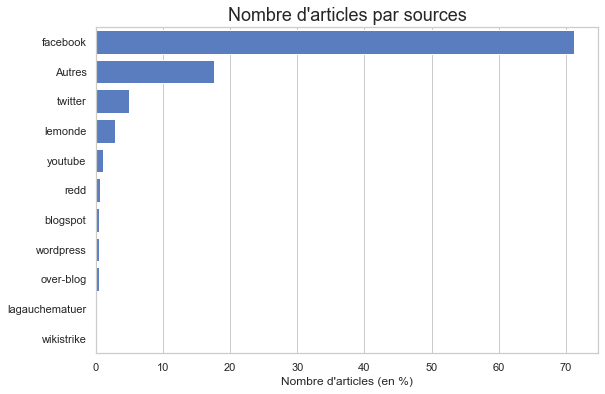

In [16]:
sns.set(style = 'whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (9, 6))

# Plot the information sources
sns.set_color_codes('muted')
sns.barplot(x = 'perc', y = 'url', data = mul_df_plot,
            label = 'Total', color = 'b').set_title('Nombre d\'articles par sources', fontsize = 18)

# Add an informative axis label
ax.set(ylabel = '',
       xlabel = 'Nombre d\'articles (en %)')

In [17]:
# Here we'll drop the rows where the dns is equal to Facebook, Twitter, Youtube or Reddit
# First, we add the url column to df_webs
df_webs['url_dns'] = df_webs['hoax_link'].apply(lambda url: tldextract.extract(url).domain)

# Then we filter the rows containing the websites we do not want to scrape.
rows_to_rm = ['facebook', 'twitter', 'youtube', 'redd']
df_webscraping = df_webs[~df_webs['url_dns'].isin(rows_to_rm)].reset_index().drop('index', axis=1).drop('url_dns', axis=1)  
df_webscraping.head(5)

# We also filter the debunk_ids which are only equal to 1 (which means there were only social networks 
# links in the hoaxes document and only the debunk remains)
df_webscraping = df_webscraping.groupby('debunk_id')
df_webscraping = df_webscraping.filter(lambda x: len(x) > 1)

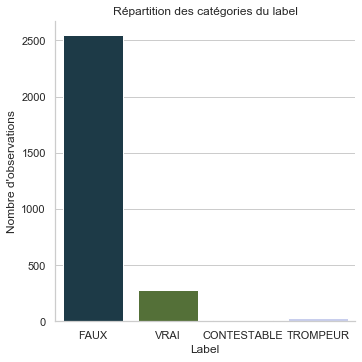

In [18]:
# Finally, we must take a look at our label to see the class imbalance and
sns.set(style = 'whitegrid')

# Plot the information sources
sns.catplot(x = 'true_false', 
            kind = 'count', 
            palette = 'cubehelix', 
            data=df_webscraping).set(title = 'Répartition des catégories du label', 
                                     xlabel = 'Label', 
                                     ylabel = 'Nombre d\'observations')

In [19]:
# We can safely remove the "Contestable" and "Trompeur" categories, which won't be informative in this analysis
searchfor = ['TROMPEUR', 'CONTESTABLE']
df_webscraping = df_webscraping[~df_webscraping.true_false.str.contains('|'.join(searchfor))]

# We also filter the debunk_ids which are only equal to 1
df_webscraping = df_webscraping.groupby('debunk_id')
df_webscraping = df_webscraping.filter(lambda x: len(x) > 1)

df_webscraping.head(5)

,debunk_id,hoax_link,true_false
0,1,http://www.paulomouvementcitoyen.com/2017/02/u...,FAUX
1,1,https://www.blog.sami-aldeeb.com/2017/02/06/pr...,FAUX
2,1,https://francaisdefrance.wordpress.com/2016/12...,FAUX
3,1,https://www.lemonde.fr/les-decodeurs/article/2...,VRAI
4,2,https://www.buzzbeed.com/macron-veut-faire-pay...,FAUX


In [20]:
filename = './data/df_webscraping_' + datetime.now().strftime("%Y-%m-%d-%H%M%S.csv")
df_webscraping.to_csv(filename, encoding = 'utf-8', header = True, index = None)